In [1]:
from sympy import *
import matplotlib.pyplot as plt

In [2]:
print("1. Определить корни")
x = Symbol('x')
func = 5*x**2+10*x-30
y = solve(func)
# print(y)
x1 = round(float(y[0]), 2)
x2 = round(float(y[1]), 2)
print(x1, x2)

1. Определить корни
1.65 -3.65


In [3]:
print("2. Найти интервалы, на которых функция возрастает")
fd = diff(func)
print(solve(0 < fd))

2. Найти интервалы, на которых функция возрастает
(-1 < x) & (x < oo)


In [4]:
print("3. Найти интервалы, на которых функция убывает")
print(solve(fd < 0))

3. Найти интервалы, на которых функция убывает
(-oo < x) & (x < -1)


4. Построить график
[45, 10, -15, -30, -35, -30, -15, 10, 45, 90, 145]


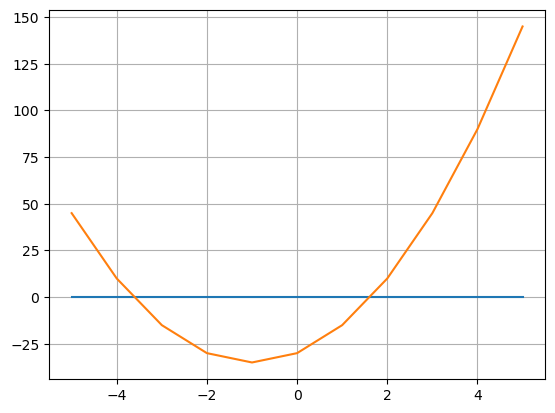

In [5]:
print("4. Построить график")
list_y = []
for i in range(-5, 6):
    x = i
    y = 5*x**2+10*x-30
    list_y.append(y)
print(list_y)
plt.plot(range(-5, 6), [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
plt.plot(range(-5, 6), list_y)
plt.grid()
plt.show()

In [6]:
print("5. Вычислить вершину")
corni = solve(fd)
top = corni[0]
x = top
y = 5*x**2+10*x-30
print(top, y)

5. Вычислить вершину
-1 -35


In [7]:
print("6. Определить промежутки, на котором f > 0")
print(solve(0 < func))

6. Определить промежутки, на котором f > 0
((x < oo) & (-1 + sqrt(7) < x)) | ((-oo < x) & (x < -sqrt(7) - 1))


In [8]:
print("7. Определить промежутки, на котором f < 0")
print(solve(func < 0))

7. Определить промежутки, на котором f < 0
(x < -1 + sqrt(7)) & (-sqrt(7) - 1 < x)


In [9]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy

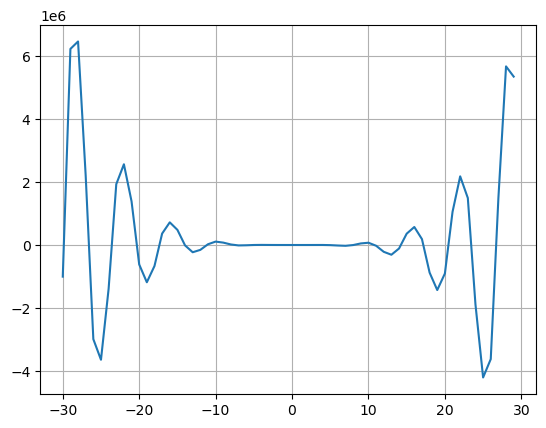

In [10]:
# График функций, при помощи библиотеки matplotlib:
x = [x for x in range(-30, 30)]
y = [(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30) for
     x in range(-30, 30)]
# y = [y for y in range(-30, 30)]
plt.plot(x, y)
plt.grid()
plt.show()

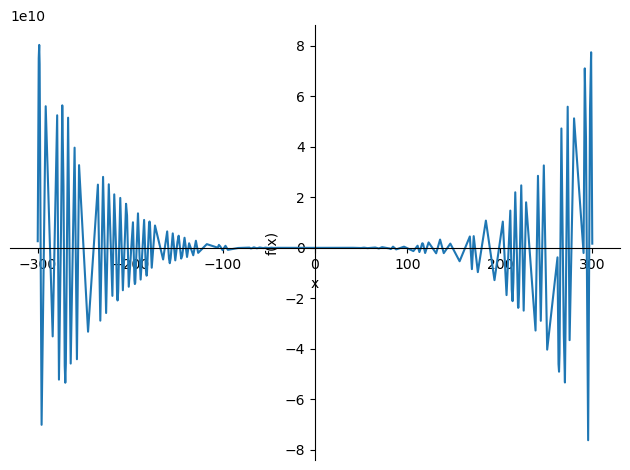

In [11]:
# График функций, при помощи библиотеки sympy:
# В диапазоне -300...300
x = symbols('x')
plot(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30,
     (x, -300, 300))

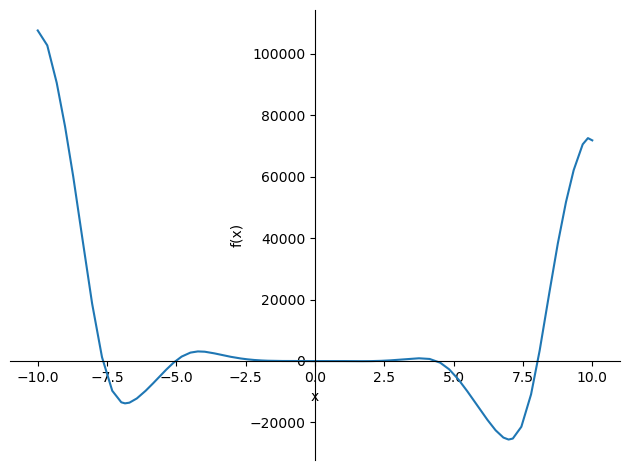

In [12]:
# В диапазоне -10...10
x = symbols('x')
plot(-12 * x ** 4 * sin(cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30,
     (x, -10, 10))

In [13]:
# Определить корни
def f(x):
    return -12 * x ** 4 * numpy.sin(
        numpy.cos(x)) - 18 * x ** 3 + 5 * x ** 2 + 10 * x - 30

In [15]:
# Это тригометрическая функция, имеющая бесконечное количество корней
# можно определить корни только на занном интервале
# Запросим их у пользователя:
# funcrange = list(
#     map(int, input('Задайте интервал функций, через пробел: ').split()))
funcrange = [-10, 10]
leftnum = min(funcrange)
rightnum = max(funcrange)
def solution():
    global leftnum, rightnum
    temp = leftnum
    rightnum = rightnum
    roots = []
    interval = []

    while temp < rightnum:
        if f(temp) >= 0 and f(temp + 1) <= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) <= 0 and f(temp + 1) >= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) > f(temp + 1) < f(temp + 2):
            interval.append(temp + 1)
        temp += 1
    roots = [round(i, 2) for i in roots]
    print(f'Корни уравнения для заданного интервала: {roots}')
    return roots

In [16]:
# Определить промежутки, на которых f>0 Рё f<0:
def func_interval(left, right):
    array = []
    temp = left
    while left < right:
        array.append([f(left), left])
        left += 0.1
    if array[0][0] > 0:
        print(f'f > 0 в промежутке {temp, right}')
        return max(array)
    else:
        print(f'f < 0 в промежутке {temp, right}')
        return min(array)

In [17]:
# вычисляем координаты вершины функции на заданном интервале:
def maxima_and_minima():
    roots = solution()

    if len(roots) < 2:
        print('На заданном интервале нет вершин')
    else:
        top = []
        for i in range(len(roots) - 1):
            top.append(func_interval(roots[i], roots[i + 1]))
        for j in top:
            j = [round(i, 2) for i in j]
            print(f'Координаты вершин функции: [{j[1]}, {j[0]}]')
        if len(top) < 2:
            print('error')
        else:
            for i in range(len(top) - 1):
                if top[i][0] > top[i + 1][0]:
                    print('Функция убывает')
                else:
                    print('Фунция возрастает')

In [20]:
print(solution())

Корни уравнения для заданного интервала: [-7.65, -5.03, -1.34, 2.27, 4.38, 8.04]
[-7.65, -5.03, -1.34, 2.27, 4.38, 8.04]


In [21]:
print(func_interval(2.27, 4.38))

f < 0 в промежутке (2.27, 4.38)
[-0.8785169461409232, 2.27]


In [22]:
maxima_and_minima()

Корни уравнения для заданного интервала: [-7.65, -5.03, -1.34, 2.27, 4.38, 8.04]
f < 0 в промежутке (-7.65, -5.03)
f < 0 в промежутке (-5.03, -1.34)
f > 0 в промежутке (-1.34, 2.27)
f < 0 в промежутке (2.27, 4.38)
f > 0 в промежутке (4.38, 8.04)
Координаты вершин функции: [-6.85, -13815.93]
Координаты вершин функции: [-5.03, -23.2]
Координаты вершин функции: [-1.34, 0.11]
Координаты вершин функции: [2.27, -0.88]
Координаты вершин функции: [4.38, 12.9]
Фунция возрастает
Фунция возрастает
Функция убывает
Фунция возрастает
